# **Analysis of Automobiles Sales Data Project**

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loading the data
cars_df = pd.read_csv('Auto Sales data.csv')

In [3]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [6]:
cars_df['ORDERDATE'] = pd.to_datetime(cars_df['ORDERDATE'], format='%d/%m/%Y', errors='coerce')
cars_df[['ORDERNUMBER', 'ORDERLINENUMBER']] = cars_df[['ORDERNUMBER', 'ORDERLINENUMBER']].astype(str)


In [7]:
#the first & last date in the dataset
min_date = cars_df['ORDERDATE'].min()
max_date = cars_df['ORDERDATE'].max()

print("first order date:", min_date)
print("last order date:", max_date)

first order date: 2018-01-06 00:00:00
last order date: 2020-05-31 00:00:00


In [8]:
cars_df.describe()

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747,2747.000000,2747.000000
mean,35.103021,101.098952,3553.047583,2019-05-13 21:56:17.211503360,1757.085912,100.691664
min,6.000000,26.880000,482.130000,2018-01-06 00:00:00,42.000000,33.000000
25%,27.000000,68.745000,2204.350000,2018-11-08 00:00:00,1077.000000,68.000000
50%,35.000000,95.550000,3184.800000,2019-06-24 00:00:00,1761.000000,99.000000
75%,43.000000,127.100000,4503.095000,2019-11-17 00:00:00,2436.500000,124.000000
max,97.000000,252.870000,14082.800000,2020-05-31 00:00:00,3562.000000,214.000000
std,9.762135,42.042549,1838.953901,NaN,819.280576,40.114802


### Sales Perfromance Analysis: 

>**Graphing The Sales Over Time**

<Axes: title={'center': 'Total Sales Over Time'}, xlabel='ORDERDATE'>

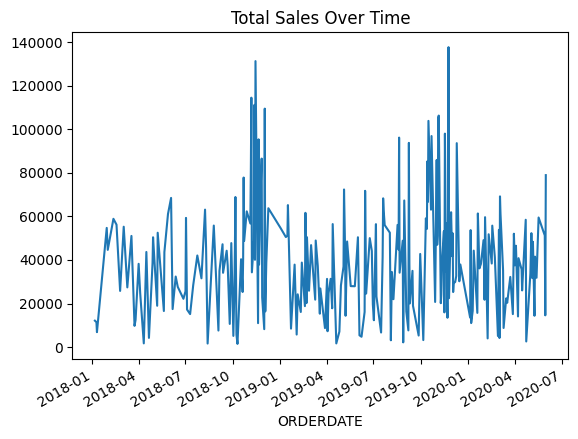

In [9]:
# visualizing the total sales over time
cars_df['ORDERDATE'] = pd.to_datetime(cars_df['ORDERDATE'])
sales_over_time = cars_df.groupby('ORDERDATE')['SALES'].sum()
sales_over_time.plot(kind='line', title='Total Sales Over Time')

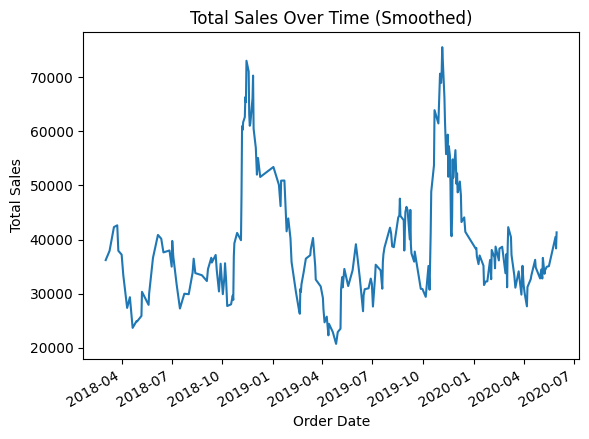

In [20]:
sales_over_time = cars_df.groupby('ORDERDATE')['SALES'].sum()
# to smooth the data, i appied a rolling average with a window (9 days)
smoothed_sales = sales_over_time.rolling(window=9).mean()
smoothed_sales.plot(kind='line', title='Total Sales Over Time (Smoothed)')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.show()

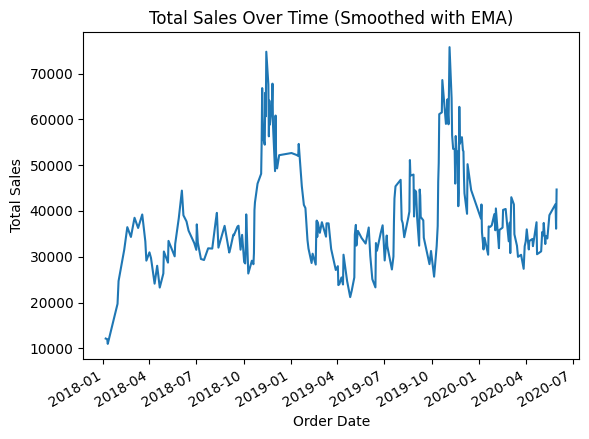

In [21]:
# Appling an exponential moving average
smoothed_sales_ema = sales_over_time.ewm(span=9, adjust=False).mean()
smoothed_sales_ema.plot(kind='line', title='Total Sales Over Time (Smoothed with EMA)')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.show()

**Orders Quantity by Order Status**

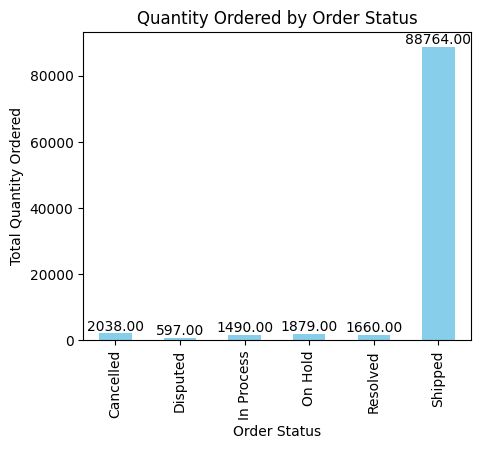

In [23]:
sales_by_status = cars_df.groupby('STATUS')['QUANTITYORDERED'].sum()
plt.figure(figsize=(5, 4))
ax = sales_by_status.plot(kind='bar', title='Quantity Ordered by Order Status', color='skyblue')
for i, value in enumerate(sales_by_status):
    ax.text(i, value, f'{value:.2f}', ha='center', va='bottom')
plt.xlabel('Order Status')
plt.ylabel('Total Quantity Ordered')
plt.show()

>**Products Lines by Quantity:**

<Axes: title={'center': 'Product lines by Sales Quantity'}, ylabel='PRODUCTLINE'>

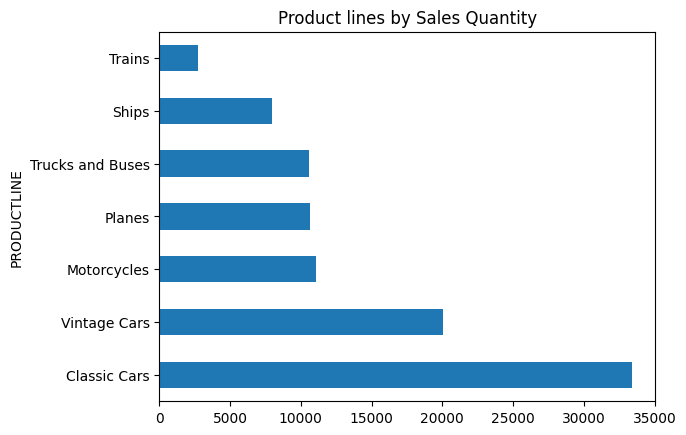

In [24]:
productlines = cars_df.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum().sort_values(ascending=False)
productlines.plot(kind='barh', title='Product lines by Sales Quantity')

>**Regions/Cities with the Highest Sales Volume:**

<Axes: title={'center': 'Top 10 Countries by Sales Quantity'}, ylabel='COUNTRY'>

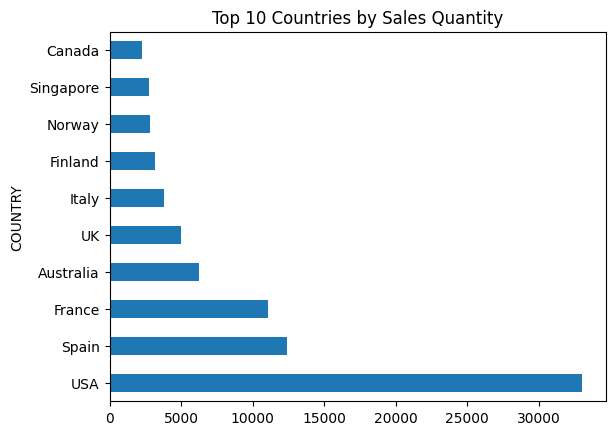

In [25]:
#countries
productlines = cars_df.groupby('COUNTRY')['QUANTITYORDERED'].sum().sort_values(ascending=False).head(10)
productlines.plot(kind='barh', title='Top 10 Countries by Sales Quantity')

<Axes: title={'center': 'Top 10 Cities by Sales Quantity'}, ylabel='CITY'>

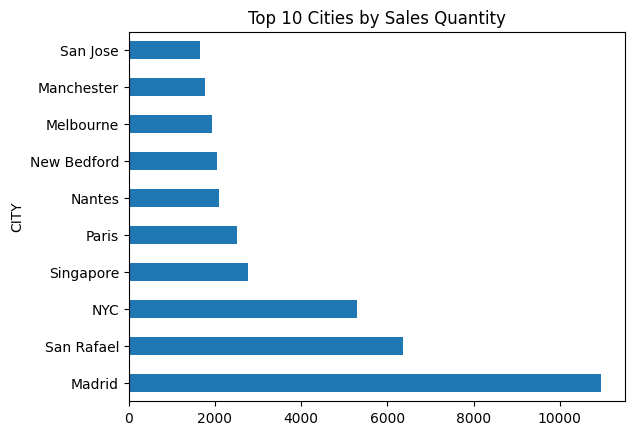

In [26]:
#Cities
productlines = cars_df.groupby('CITY')['QUANTITYORDERED'].sum().sort_values(ascending=False).head(10)
productlines.plot(kind='barh', title='Top 10 Cities by Sales Quantity')

>**Customer Behavior Analysis:**

<Axes: title={'center': 'Customer Purchase Frequency'}, ylabel='Frequency'>

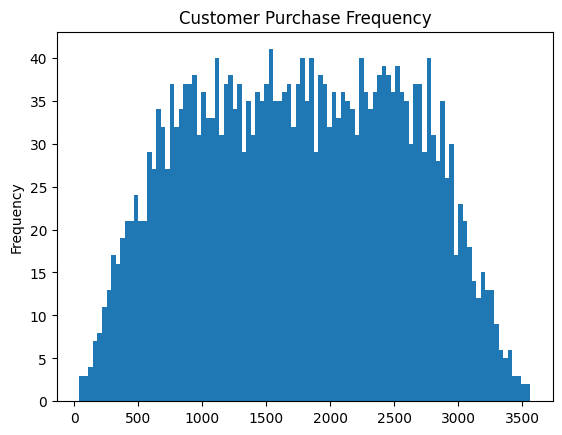

In [30]:
cars_df['DAYS_SINCE_LASTORDER'].plot(kind='hist', title='Customer Purchase Frequency', bins=100)

**Customer Purchase Frequency:**

        The histogram illustrates the distribution of days/months since the last order, providing insights into the frequency of customer orders.

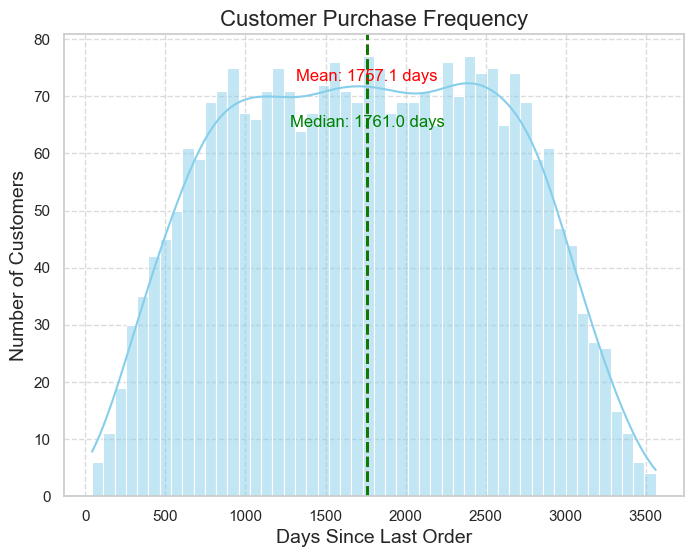

In [34]:

# Seting the aesthetic style of the plots
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
# Ploting the histogram
sns.histplot(cars_df['DAYS_SINCE_LASTORDER'], bins=50, kde=True, color='skyblue')

plt.title('Customer Purchase Frequency', fontsize=16)
plt.xlabel('Days Since Last Order', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
# gridlines
plt.grid(True, linestyle='--', alpha=0.7)
# Annotating key points for this case the mean and the meadian are considered
mean_val = cars_df['DAYS_SINCE_LASTORDER'].mean()
median_val = cars_df['DAYS_SINCE_LASTORDER'].median()

plt.axvline(mean_val, color='red', linestyle='--', linewidth=2)
plt.axvline(median_val, color='green', linestyle='--', linewidth=2)
plt.text(mean_val, plt.gca().get_ylim()[1] * 0.9, f'Mean: {mean_val:.1f} days', color='red', fontsize=12, ha='center')
plt.text(median_val, plt.gca().get_ylim()[1] * 0.8, f'Median: {median_val:.1f} days', color='green', fontsize=12, ha='center')

plt.show()

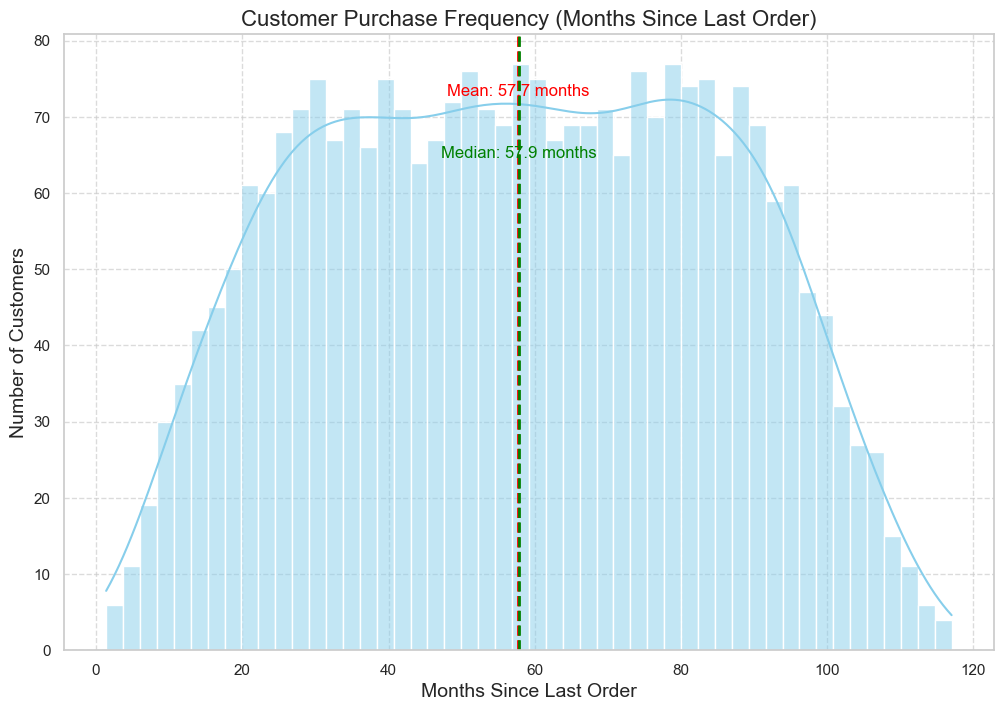

In [35]:
# converting the days into months
cars_df['MONTHS_SINCE_LASTORDER'] = cars_df['DAYS_SINCE_LASTORDER'] / 30.44

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

sns.histplot(cars_df['MONTHS_SINCE_LASTORDER'], bins=50, kde=True, color='skyblue')

plt.title('Customer Purchase Frequency (Months Since Last Order)', fontsize=16)
plt.xlabel('Months Since Last Order', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)

mean_val = cars_df['MONTHS_SINCE_LASTORDER'].mean()
median_val = cars_df['MONTHS_SINCE_LASTORDER'].median()

plt.axvline(mean_val, color='red', linestyle='--', linewidth=2)
plt.axvline(median_val, color='green', linestyle='--', linewidth=2)
plt.text(mean_val, plt.gca().get_ylim()[1] * 0.9, f'Mean: {mean_val:.1f} months', color='red', fontsize=12, ha='center')
plt.text(median_val, plt.gca().get_ylim()[1] * 0.8, f'Median: {median_val:.1f} months', color='green', fontsize=12, ha='center')

plt.show()

>**Sales by Deal Size:**


        The bar chart illustrates the distribution of sales by deal size, providing an analysis of the impact of various deal sizes on total sales.

<Axes: title={'center': 'Sales by Deal Size'}, xlabel='DEALSIZE'>

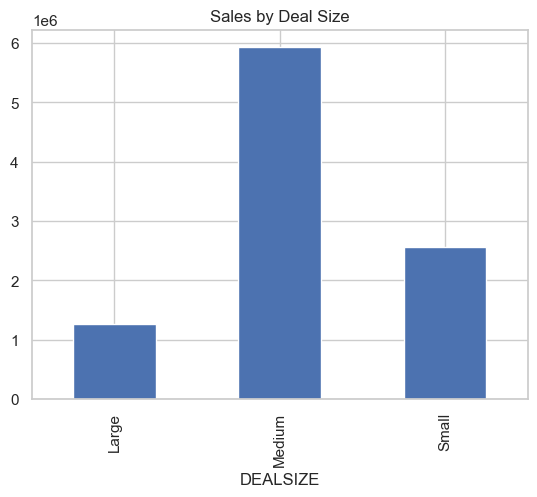

In [36]:
sales_by_dealsize = cars_df.groupby('DEALSIZE')['SALES'].sum()
sales_by_dealsize.plot(kind='bar', title='Sales by Deal Size')

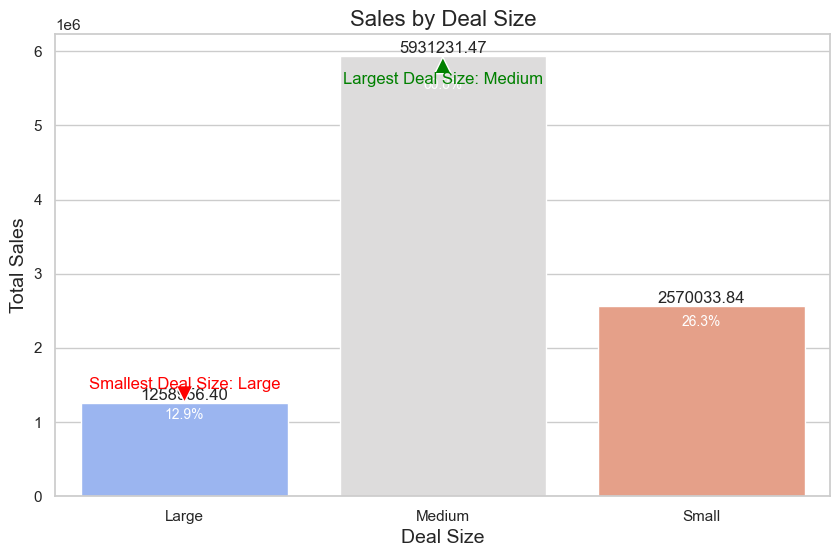

In [37]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
colors = sns.color_palette("coolwarm", len(sales_by_dealsize))
ax = sns.barplot(x=sales_by_dealsize.index, y=sales_by_dealsize.values, palette=colors)

plt.title('Sales by Deal Size', fontsize=16)
plt.xlabel('Deal Size', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

# Adding labels above each bar
for i, value in enumerate(sales_by_dealsize):
    ax.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

# Calculating & displaying percentage of total sales for each deal size
total_sales = sales_by_dealsize.sum()
for i, value in enumerate(sales_by_dealsize):
    percentage = (value / total_sales) * 100
    ax.text(i, value * 0.95, f'{percentage:.1f}%', ha='center', va='top', fontsize=10, color='white')

# Annotating the largest and smallest deal size sales
max_deal = sales_by_dealsize.idxmax()
min_deal = sales_by_dealsize.idxmin()
ax.annotate(f'Largest Deal Size: {max_deal}', 
            xy=(sales_by_dealsize.index.get_loc(max_deal), sales_by_dealsize.max()), 
            xytext=(0, -20), 
            textcoords='offset points',
            arrowprops=dict(facecolor='green', shrink=0.05),
            fontsize=12, color='green', ha='center')

ax.annotate(f'Smallest Deal Size: {min_deal}', 
            xy=(sales_by_dealsize.index.get_loc(min_deal), sales_by_dealsize.min()), 
            xytext=(0, 10), 
            textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            fontsize=12, color='red', ha='center')
plt.show()

**Top Customers by Sales:**

<Axes: title={'center': 'Top 10 Customers by Sales'}, xlabel='CUSTOMERNAME'>

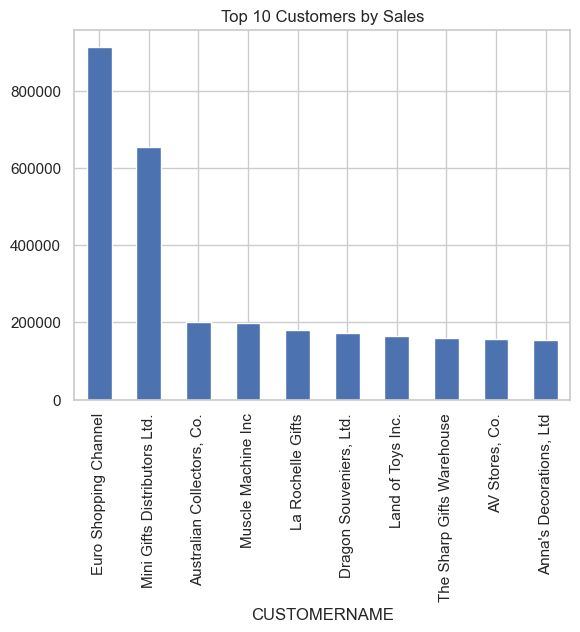

In [38]:
top_customers = cars_df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', title='Top 10 Customers by Sales')

>**Product Line Analysis**

**Sales by Product Line:**

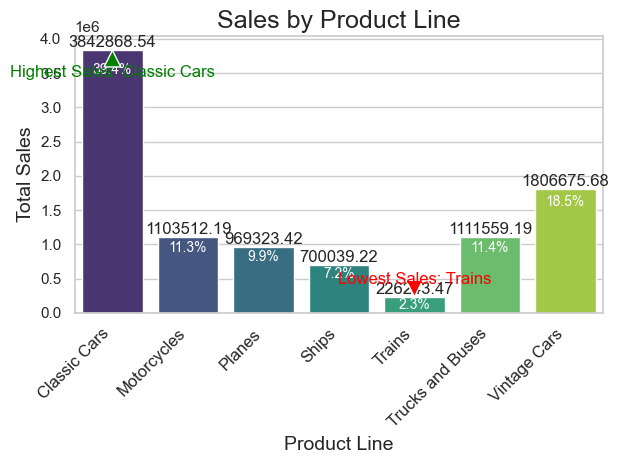

In [42]:
sales_by_productline = cars_df.groupby('PRODUCTLINE')['SALES'].sum()
colors = sns.color_palette("viridis", len(sales_by_productline))
ax = sns.barplot(x=sales_by_productline.index, y=sales_by_productline.values, palette=colors)

# Add a title and labels
plt.title('Sales by Product Line', fontsize=18)
plt.xlabel('Product Line', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

# Rotate the x-axis labels if necessary
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add labels above each bar
for i, value in enumerate(sales_by_productline):
    ax.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

# Calculate and display percentage of total sales for each product line
total_sales = sales_by_productline.sum()
for i, value in enumerate(sales_by_productline):
    percentage = (value / total_sales) * 100
    ax.text(i, value * 0.95, f'{percentage:.1f}%', ha='center', va='top', fontsize=10, color='white')

# Annotate the product line with the highest and lowest sales
max_productline = sales_by_productline.idxmax()
min_productline = sales_by_productline.idxmin()
ax.annotate(f'Highest Sales: {max_productline}', 
            xy=(sales_by_productline.index.get_loc(max_productline), sales_by_productline.max()), 
            xytext=(0, -20), 
            textcoords='offset points',
            arrowprops=dict(facecolor='green', shrink=0.05),
            fontsize=12, color='green', ha='center')

ax.annotate(f'Lowest Sales: {min_productline}', 
            xy=(sales_by_productline.index.get_loc(min_productline), sales_by_productline.min()), 
            xytext=(0, 10), 
            textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            fontsize=12, color='red', ha='center')

# Display the plot
plt.tight_layout()
plt.show()

**Orders Volume by Product Line:**

<Axes: title={'center': 'Quantity Ordered by Product Line and Deal Size'}, xlabel='PRODUCTLINE'>

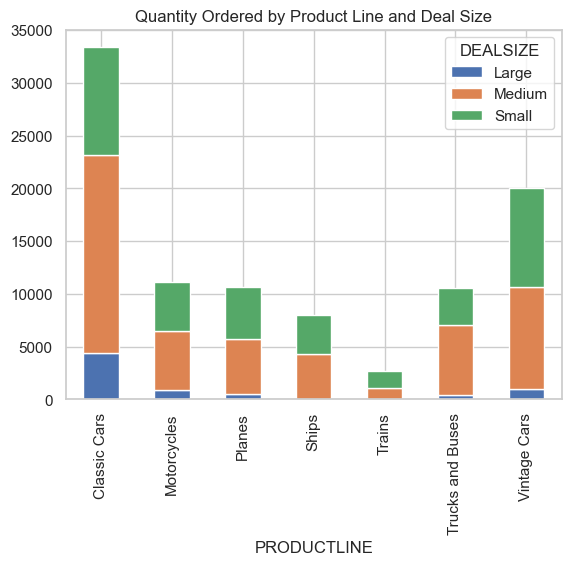

In [44]:
quantity_by_productline = cars_df.groupby(['PRODUCTLINE', 'DEALSIZE'])['QUANTITYORDERED'].sum().unstack()
quantity_by_productline.plot(kind='bar', stacked=True, title='Quantity Ordered by Product Line and Deal Size')

>**Geographical Analysis**

**Sales by Country:**

<Axes: title={'center': 'Sales by Country'}, xlabel='COUNTRY'>

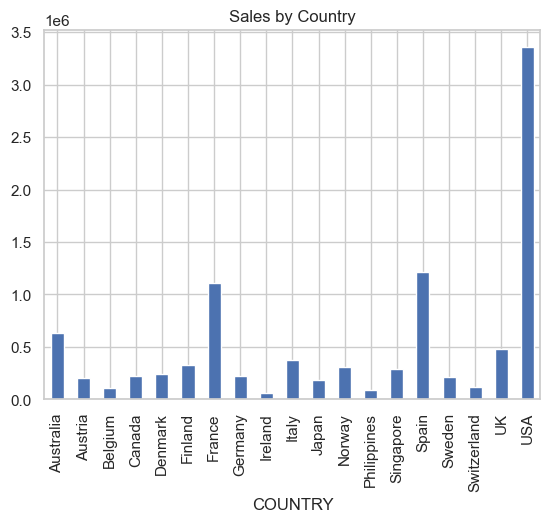

In [45]:
sales_by_country = cars_df.groupby('COUNTRY')['SALES'].sum()
sales_by_country.plot(kind='bar', title='Sales by Country')

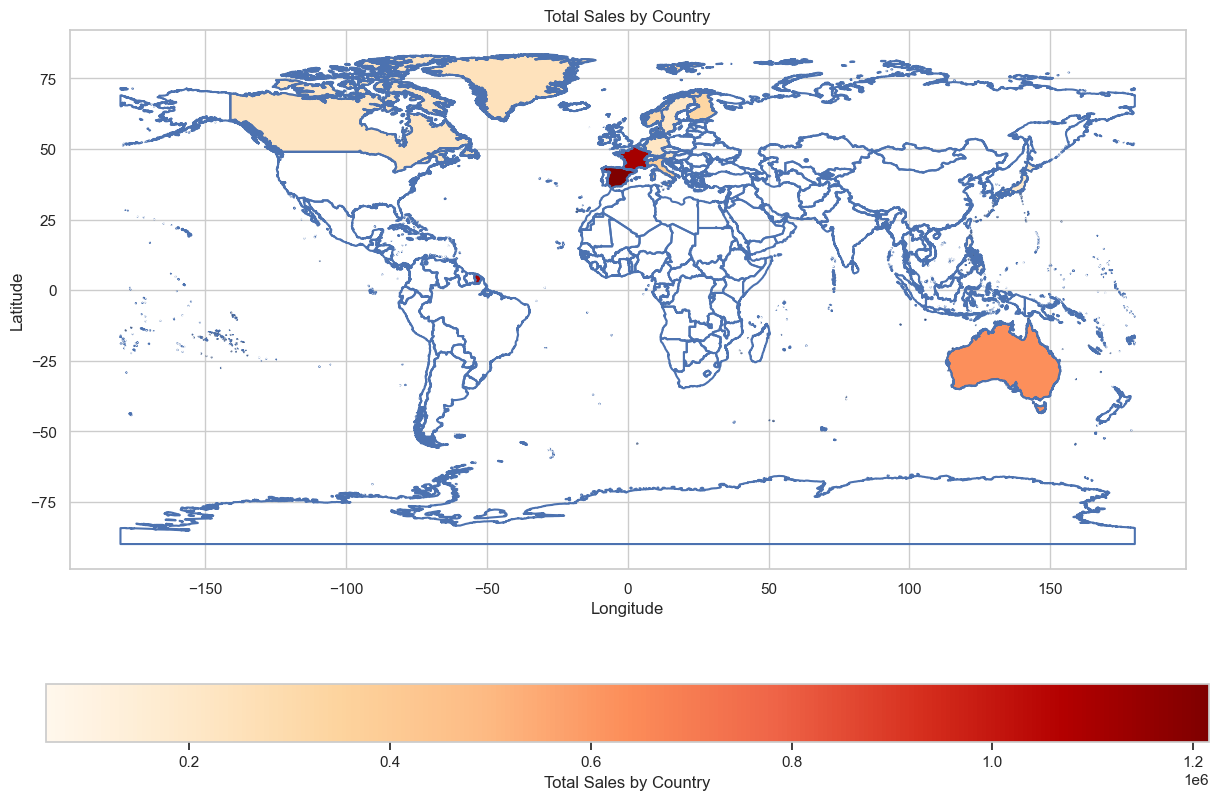

In [63]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Loading the world map data from a local shapefile 
#this shapefile i downloaded it from (Natural Earth)
world = gpd.read_file(r'ne_10m_admin_0_countries\ne_10m_admin_0_countries.shp')
# sales by country
sales_by_country = cars_df.groupby('COUNTRY')['SALES'].sum().reset_index()

# using 'SOVEREIGNT' as the key for merging the sales data with the world map data
world_sales = world.merge(sales_by_country, how="left", left_on="SOVEREIGNT", right_on="COUNTRY")

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world_sales.plot(column='SALES', ax=ax, legend=True,
                 legend_kwds={'label': "Total Sales by Country",
                              'orientation': "horizontal"},
                 cmap='OrRd', edgecolor='k')

# Add titles and labels
plt.title('Total Sales by Country')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

>**Time Series and Trend Analysis**

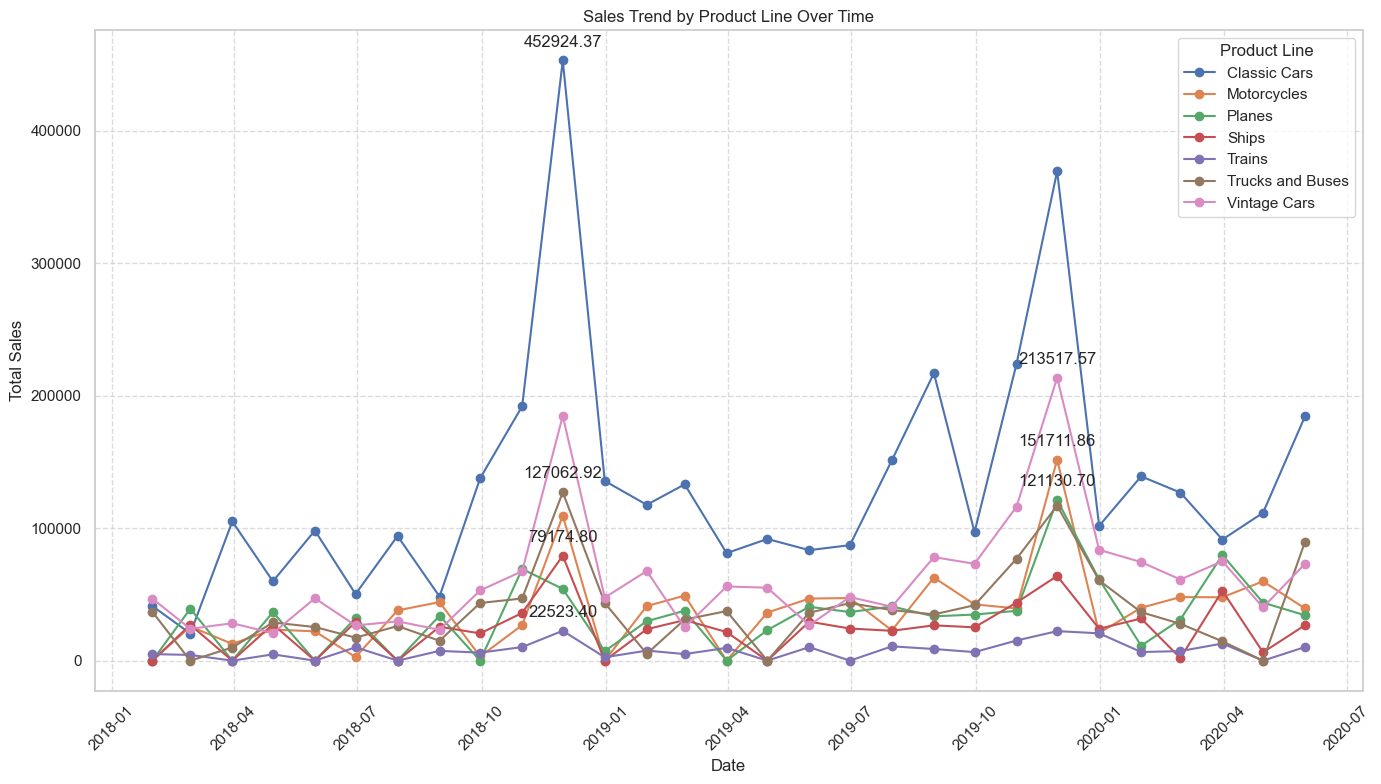

In [67]:
# Resampling the data to monthly sales for each product line
monthly_sales_trend = cars_df.groupby(['ORDERDATE', 'PRODUCTLINE'])['SALES'].sum().unstack().resample('M').sum()

plt.figure(figsize=(14, 8))
for product_line in monthly_sales_trend.columns:
    plt.plot(monthly_sales_trend.index, monthly_sales_trend[product_line], label=product_line, marker='o')

plt.title('Sales Trend by Product Line Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Product Line')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# adding annotations for key points
for product_line in monthly_sales_trend.columns:
    max_sales_date = monthly_sales_trend[product_line].idxmax()
    max_sales_value = monthly_sales_trend[product_line].max()
    plt.annotate(f'{max_sales_value:.2f}', (max_sales_date, max_sales_value), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()